In [23]:
# !pip install lxml matplotlib

In [24]:
import xml.etree.ElementTree as ET
import albumentations as A
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [25]:
IMAGE_PATH = os.path.join("DataCollection", "images")
LABEL_PATH = os.path.join("DataCollection", "labels"

In [107]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, x_max, y_max = [int(coord) for coord in bbox]
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, class_names):
    img = image.copy()
    for bbox, class_name in zip(bboxes, class_names):
        img = visualize_bbox(img, bbox, class_name)
    plt.imshow(img)
    plt.show()

## Convert single label

In [34]:
file_name = "c2c94bee-64ef-11ed-8bda-acde48001122"
OBJECT_CLASS = "glasses"

In [79]:
def get_annotation(path):
    tree = ET.parse(path)
    root = tree.getroot()

    label = root.find('object').find('name').text
    width = int(root.find('size')[0].text)
    height = int(root.find('size')[1].text)    

    xmin = int(root.find('object').find('bndbox').find('xmin').text)
    ymin = int(root.find('object').find('bndbox').find('ymin').text)
    xmax = int(root.find('object').find('bndbox').find('xmax').text)
    ymax = int(root.find('object').find('bndbox').find('ymax').text)
    
    coords = [xmin, ymin, xmax, ymax]
    
    return coords, label, width, height
    
get_annotation(f"{os.path.join(LABEL_PATH, OBJECT_CLASS, file_name)}.xml")

([605, 226, 862, 362], 'glasses', 1280, 720)

## Create augmentor

In [80]:
def resize_image(img_arr, bboxes, class_labels, h = 224, w = 224):
    """
    :param img_arr: original image as a numpy array
    :param bboxes: bboxes as numpy array where each row is 'x_min', 'y_min', 'x_max', 'y_max', "class_id"
    :param class_labels: list of labels for the bboxes
    :param h: resized height dimension of image
    :param w: resized weight dimension of image
    :return: dictionary containing {image:transformed, bboxes:['x_min', 'y_min', 'x_max', 'y_max', "class_id"]}
    """
    # create resize transform pipeline
    transform = A.Compose([
        A.Resize(height=h, width=w, always_apply=True),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.2),
    ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['class_labels']))

    transformed = transform(image=img_arr, bboxes=bboxes, class_labels=class_labels)

    return transformed

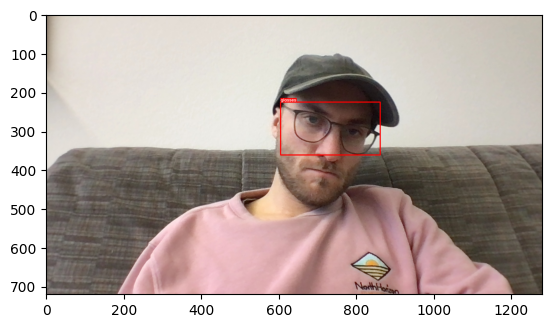

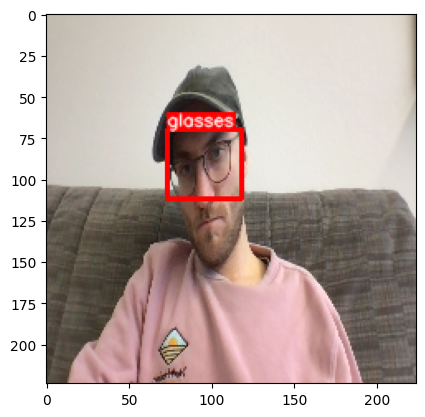

In [109]:
coords, label, width, height = get_annotation(f"{os.path.join(LABEL_PATH, OBJECT_CLASS, file_name)}.xml")
image = cv2.imread(os.path.join(IMAGE_PATH, OBJECT_CLASS, f'{file_name}.jpg'))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Visualize raw image
visualize(image, [coords], [label])

# Visualize augmented image
transformed = resize_image(image, [coords], [labfel])
visualize(transformed['image'], transformed['bboxes'], transformed['class_labels'])